## Content
* [Project Description]
* [Step 1 Import Libraries]
* [Step 2 Data Retrieval]
* [Step 3 SQL Session]
    * [Step 3.1 SQL Data Description]
* [Step 4 Import The Dataset Obtained From The SQL Query]
* [Step 5 Checking Datasets]
* [Step 6 Fixing The Data Type]
* [Step 7 Adding data information]
* [Step 8 Data Analysis]
    * [Step 8.1 Top 10 Neighborhoods Based on The Number of Trips]
    * [Step 8.2 Taxi Companies and Their Number of Trips]
* [Step 9 Conclusion]
* [Step 10 Hypothesis Testing]
* [Step 11 Conclusion]

## Project Description
In this project, we will analyze passenger preferences and the external factors that influence trips. The data we are using is obtained from a **competitor's** database.

## Import Libraries

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Data Retriaval

In [2]:
URL = 'https://practicum-content.s3.us-west-1.amazonaws.com/data-analyst-eng/moved_chicago_weather_2017.html'
req = requests.get(URL)
soup = BeautifulSoup(req.text, 'lxml')

In [3]:
heading_table = []
for row in soup.find_all('th'):
    heading_table.append(row.text)

content = []
for row in soup.find_all('tr'):
    if not row.find_all('th'):
        content.append([element.text for element in row.find_all('td')])
        
weather_records = pd.DataFrame(content, columns = heading_table)
weather_records

,Date and time,Temperature,Description
0,2017-11-01 00:00:00,276.150,broken clouds
1,2017-11-01 01:00:00,275.700,scattered clouds
2,2017-11-01 02:00:00,275.610,overcast clouds
3,2017-11-01 03:00:00,275.350,broken clouds
4,2017-11-01 04:00:00,275.240,broken clouds
...,...,...,...
692,2017-11-29 20:00:00,281.340,few clouds
693,2017-11-29 21:00:00,281.690,sky is clear
694,2017-11-29 22:00:00,281.070,few clouds
695,2017-11-29 23:00:00,280.060,sky is clear


## SQL Session
Since the SQL database is on a server platform, I will share the SQL script that I have created to complete the assigned task.

### SQL Data Description

Database containing taxi trip information in Chicago:
Table `neighborhoods`: data related to neighborhoods in the city of Chicago

- _name_: neighborhood name
- _neighborhood_id_: neighborhood code

Table `cabs`: taxi-related data

- _cab_id_: vehicle code
- _vehicle_id_: technical vehicle ID
- _company_name_: company name that owns the vehicle

Table `trips`: trip-related data

- _trip_id_: trip code
- _cab_id_: operating vehicle code
- _start_ts_: start date and time of the trip (time rounded to the nearest hour)
- _end_ts_: end date and time of the trip (time rounded to the nearest hour)
- _duration_seconds_: trip duration in seconds
- _distance_miles_: trip distance in miles
- _pickup_location_id_: pickup neighborhood code
- _dropoff_location_id_: drop-off neighborhood code

Table `weather_records`: weather-related data

- _record_id_: weather record code
- _ts_: date and time when the weather record was taken (time rounded to the nearest hour)
- _temperature_: temperature at the time of the weather recording
- _description_: brief description of the weather conditions, such as "light rain" or "scattered clouds"

1. Display the `company_name` column. Find the number of taxi trips for each taxi company on November 15-16, 2017. Then, rename the resulting column as `trips_amount` and display that column as well. Sort the results based on the `trips_amount` column in descending order.

2. Find the total number of trips for each taxi company whose name contains the word "Yellow" or "Blue" on November 1-7, 2017. Name the resulting variable as `trips_amount`. Group the results by the `company_name` column.

3. For the period from November 1 to November 7, 2017, the two most popular taxi companies are Flash Cab and Taxi Affiliation Services. Find the total number of trips for both companies and name the resulting variable as `trips_amount`. Combine the trips from all other companies into one group called "Other". Group the data by the taxi company name and name the column containing the taxi company name as `company`. Sort the results in descending order based on `trips_amount`.

4. Retrieve data about the neighborhood IDs for O'Hare and Loop from the `neighborhoods` table.

5. For each hour, retrieve weather condition records from the `weather_records` table. Using the CASE operator, divide all hours into two groups: "Bad" if the `description` column contains the words "rain" or "storm," and "Good" for the rest that don't include these two words. Name the resulting column as `weather_conditions`. The final table should include two columns: `ts` for date and time and `weather_conditions`.

6. Retrieve from the `trips` table all trips that started in Loop (pickup_location_id: 50) on a Saturday and ended in O'Hare (dropoff_location_id: 63). Get the weather conditions for each trip using the method you applied in the previous task. Also, retrieve the duration for each trip. Exclude trips for which weather condition data is not available. 

The columns in the table should be displayed in the following order:
- start_ts
- weather_conditions
- duration_seconds

Sort the results based on `trip_id`.

After the data has been retrieved, the dataset will be saved in CSV format, and hypothesis testing will be conducted.

##  Import The Dataset Obtained From The SQL Query

In [4]:
try:
    company_df = pd.read_csv('D:\datasets\projek_6\moved_project_sql_result_01.csv')
    trips_df = pd.read_csv('D:\datasets\projek_6\moved_project_sql_result_04.csv')
    df_test = pd.read_csv('D:\datasets\projek_6\moved_project_sql_result_07.csv')
except:
    company_df = pd.read_csv('/datasets/project_sql_result_01.csv')
    trips_df = pd.read_csv('/datasets/project_sql_result_04.csv')
    df_test = pd.read_csv('/datasets/project_sql_result_07.csv')

In [5]:
# company data
company_df.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [6]:
# trips data
trips_df.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
# test data
df_test.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


## Checking Dataset

In [8]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [9]:
trips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


From the information provided, the following results are obtained:

- For the `company_df` data, it has 64 rows. There are no missing values, and the data types are correct.
- For the `trips_df` data, it has 94 rows. There are no missing values, and the data types are correct.
- For the `df_test` data, it has 1068 rows. There are no missing values, but there are columns with incorrect data types, namely the `start_ts` column with the object data type and the `duration_seconds` column with the float data type.

## Fixing The Data Type

In [11]:
df_test['start_ts'] = pd.to_datetime(df_test['start_ts'], format='%Y-%m-%d %H:%M')

In [12]:
df_test['start_ts']

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1065   2017-11-11 13:00:00
1066   2017-11-11 08:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 1068, dtype: datetime64[ns]

In [13]:
df_test['duration_seconds'] = df_test['duration_seconds'].astype('int64') 

In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


In [15]:
df_test.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440


## Adding Data Information

In [16]:
df_test['day_of_month'] = df_test['start_ts'].dt.day_name()

In [17]:
df_test

,start_ts,weather_conditions,duration_seconds,day_of_month
0,2017-11-25 16:00:00,Good,2410,Saturday
1,2017-11-25 14:00:00,Good,1920,Saturday
2,2017-11-25 12:00:00,Good,1543,Saturday
3,2017-11-04 10:00:00,Good,2512,Saturday
4,2017-11-11 07:00:00,Good,1440,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0,Saturday
1064,2017-11-11 10:00:00,Good,1318,Saturday
1065,2017-11-11 13:00:00,Good,2100,Saturday
1066,2017-11-11 08:00:00,Good,1380,Saturday


## Data Analysis

### Top 10 Neighborhoods Based on The Number of Trips

In [18]:
# The average number of trips based on the dropoff location
sum_trips = trips_df.pivot_table(index='dropoff_location_name', values='average_trips', aggfunc='sum')\
.sort_values(by='average_trips', ascending=False).head(10).reset_index()

In [19]:
sum_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


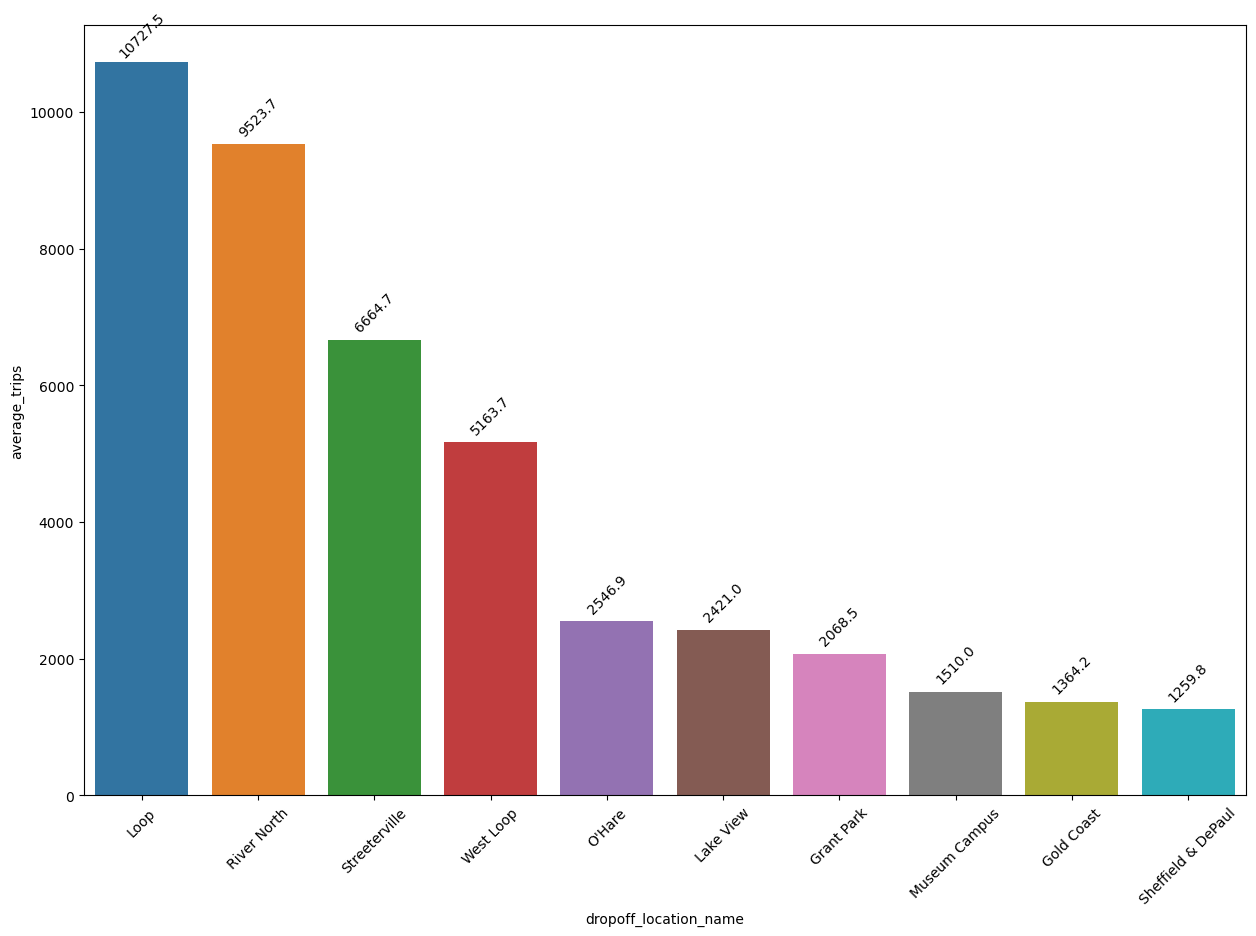

In [20]:
# plot table
plt.figure(figsize=(15,10)) 
splot = sns.barplot(data=sum_trips, x='dropoff_location_name', y='average_trips') 

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')

plt.xticks(rotation = 45) 
plt.show()

### Taxi Companies and Their Number of Trips

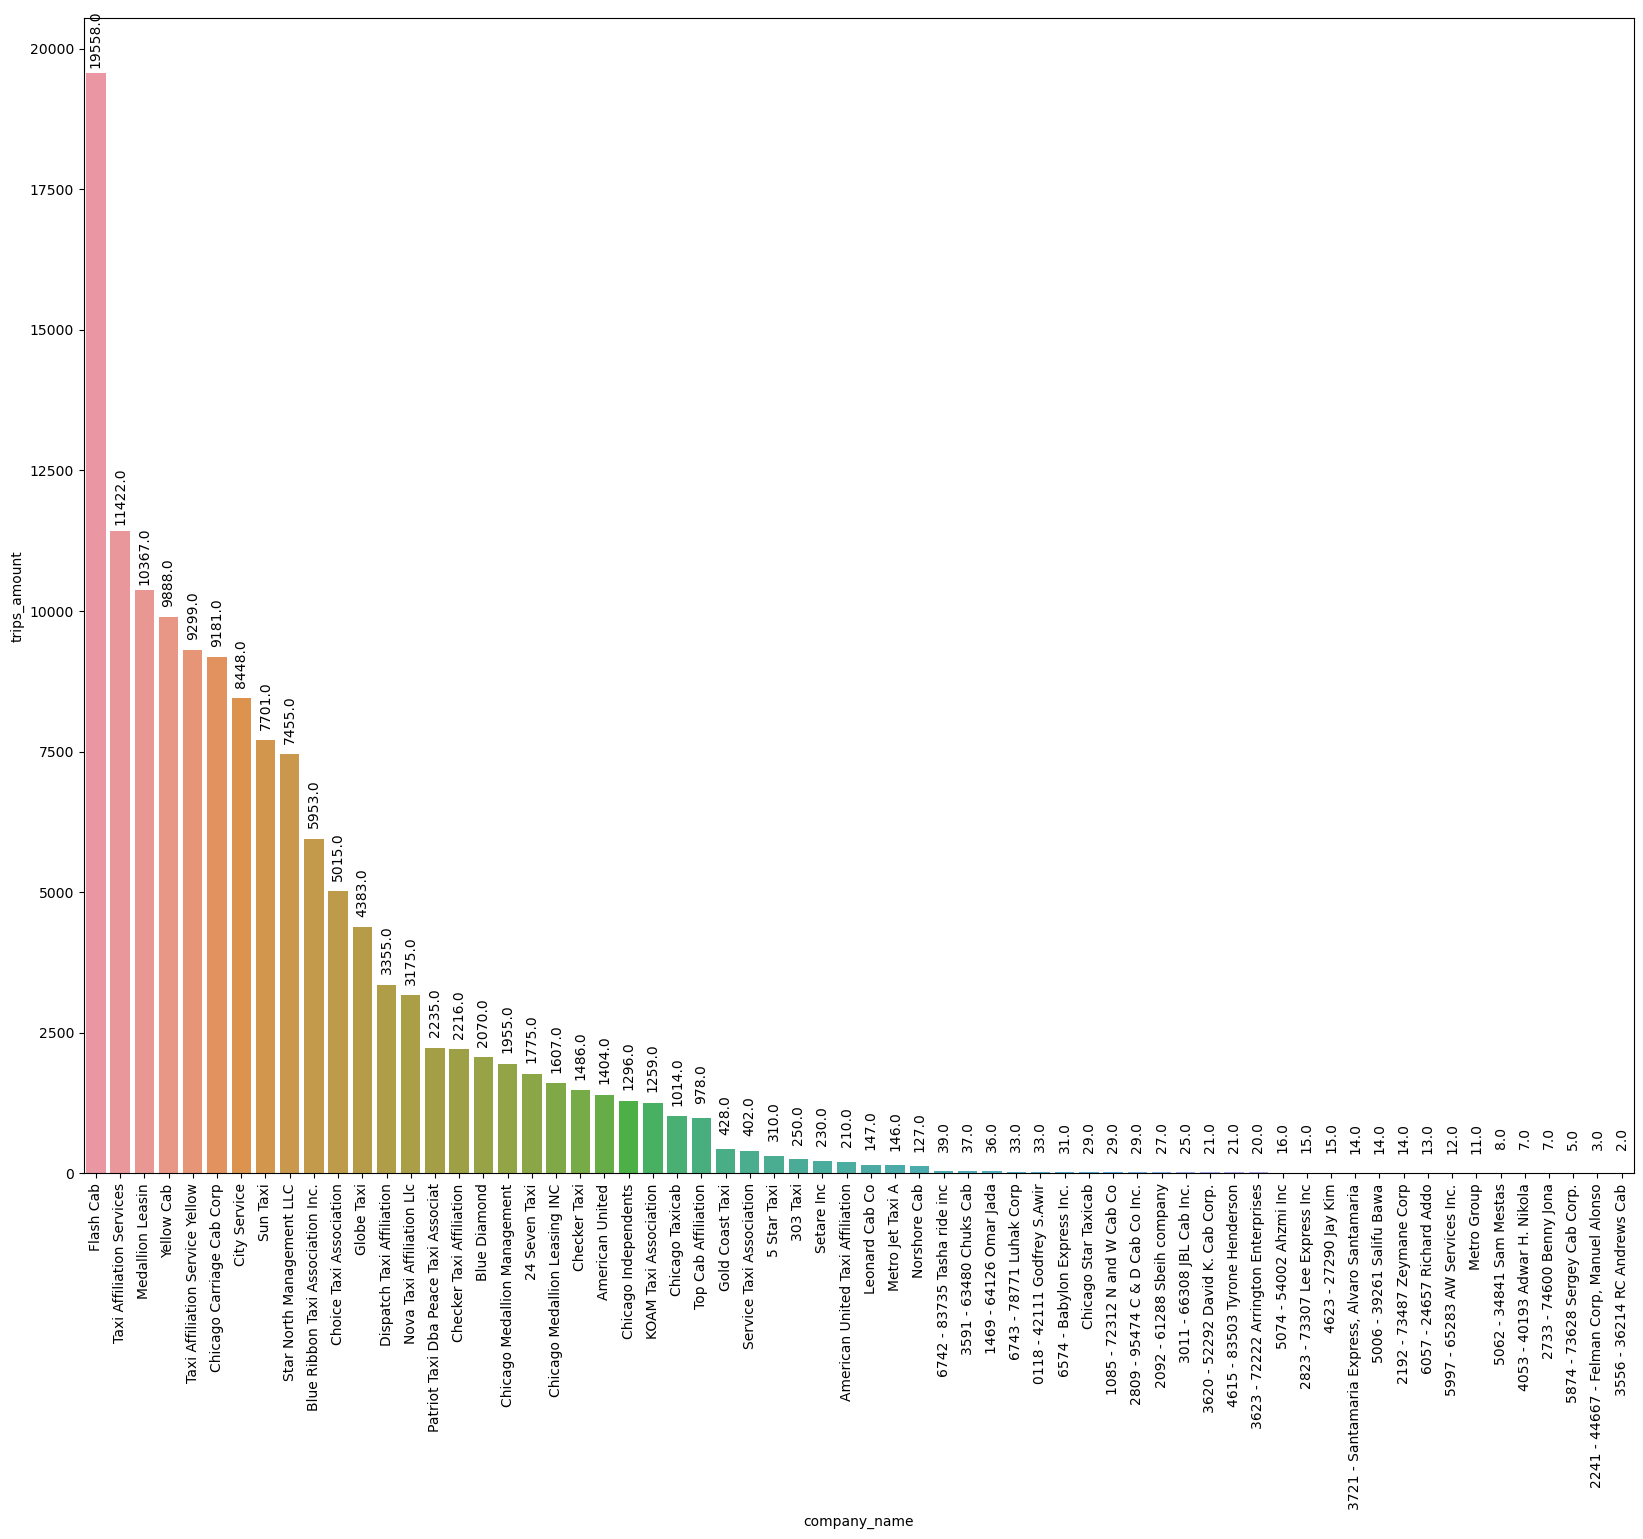

In [21]:
plt.figure(figsize=(20,15)) 
splot = sns.barplot(data=company_df, x='company_name', y='trips_amount') # assign plot kedalam object

for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 25), rotation=90, 
                   textcoords = 'offset points')

plt.xticks(rotation = 90) 
plt.show()

From the information provided, it can be concluded that:

- The company with the highest number of trips is Flash Cab.
- The company with the lowest number of trips is 3556 - 36214 RC Andrews Cab.
- The most common dropoff locations are Loop, River North, Streetville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.

## Conclusion

From the information provided, it can be concluded that:

- Flash Cab is the company with the highest number of trips. This could be because Flash Cab is an established taxi company that has been operating for a long time. Meanwhile, the company with the lowest number of trips might be relatively new in the industry.

- For the neighborhoods, Loop is the neighborhood with the highest concentration of dropoff points. This is likely because Loop is a bustling area with eclectic dining, shopping, theaters, and parks. It's not surprising that many people visit or work in the city center.

- The 10th neighborhood is close to a campus, so most of the trips in this area are likely to involve students.

- To increase taxi revenue, it seems that placing more taxis in the Loop area would be a good strategy, as it is a popular pick-up and drop-off location.

## Hypothesis Testing

- $H_0 : $ The average trip duration from Loop to O'Hare International Airport is the same on rainy Saturdays.
- $H_1 : $ The average trip duration from Loop to O'Hare International Airport has changed on rainy Saturdays.

Since we are testing the hypothesis that the average trip duration from Loop to O'Hare International Airport is the same or different on rainy Saturdays, we will use a two-tailed test. The chosen alpha level is 0.05.

We will collect data for both rainy and clear weather conditions to compare whether the average durations are the same or different on rainy and clear days.

In [22]:
# Splitting the dataset into two categories: good weather and bad weather
good = df_test.query('weather_conditions == "Good"')
bad = df_test.query('weather_conditions == "Bad"')

In [24]:
# Testing the hypothesis with a 95% confidence level
alpha = 0.05
results = st.stats.ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=False)
print("p-value :", results.pvalue)

if (results.pvalue < alpha):
    print("We reject null hypothesis.")
else:
    print("We accept null hypothesis.")

p-value : 6.738994326108734e-12
We reject null hypothesis.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_3160\3109941353.py:3: DeprecationWarning: Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  results = st.stats.ttest_ind(good['duration_seconds'], bad['duration_seconds'], equal_var=False)


## Conclusion

The data above was obtained using queries from the database.

Before starting the analysis, we need to check the data:
- There are no issues with the data in company_df and trips_df.
- There is an issue with the data in df_test, specifically with the data types in the start_ts column (object data type) and duration_seconds column (float data type).
- We need to change the data types in the start_ts and duration_seconds columns to match their appropriate data types.

Data Analysis:
In this section, we are instructed to create graphs for the top 10 neighborhoods based on the number of trips and taxi companies with their trip counts. From this analysis, we can conclude:
- The company with the highest number of trips is Flash Cab.
- The company with the lowest number of trips is 3556 - 36214 RC Andrews Cab.
- The most common dropoff locations are Loop, River North, Streetville, West Loop, O'Hare, Lake View, Grant Park, Museum Campus, Gold Coast, Sheffield & DePaul.

Hypothesis Testing Analysis:
- Moving on to hypothesis testing. In this hypothesis test, we are testing whether the average trip duration from Loop to O'Hare International Airport changes on rainy Saturdays.
- The alpha value will be set at 5%. This choice is made because of the 95% confidence interval.
- The result is that we reject the null hypothesis.

**Conclusion:** The results of this analysis are as follows:
- Flash Cab is the taxi company with the highest number of trips, likely due to its long-standing presence in the market.
- The most frequently visited location is Loop, likely because it's a bustling area.
- The best weather condition for booking a taxi appears to be clear weather.